# Learning Rate Analysis

$ g(x) = x^4 -4x^2 + 5 $

In [8]:
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

In [14]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x_2 = np.linspace(-2, 2, 1000)

In [15]:
# Gradient Descent Function
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, 
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

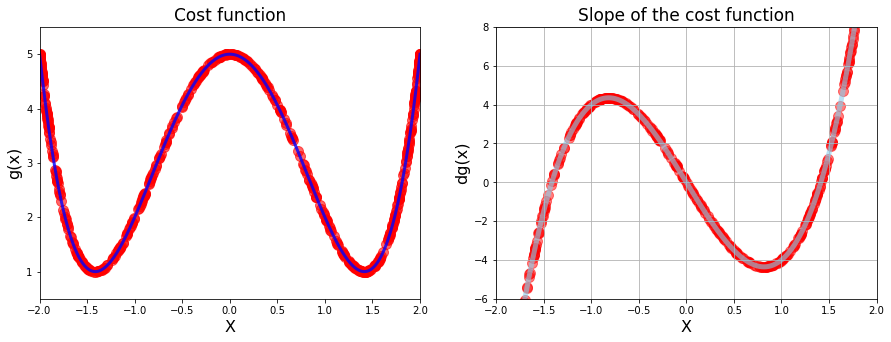

Number of steps is:  501


In [19]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,multiplier = 0.25, max_iter = 500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print("Number of steps is: ",len(list_x))

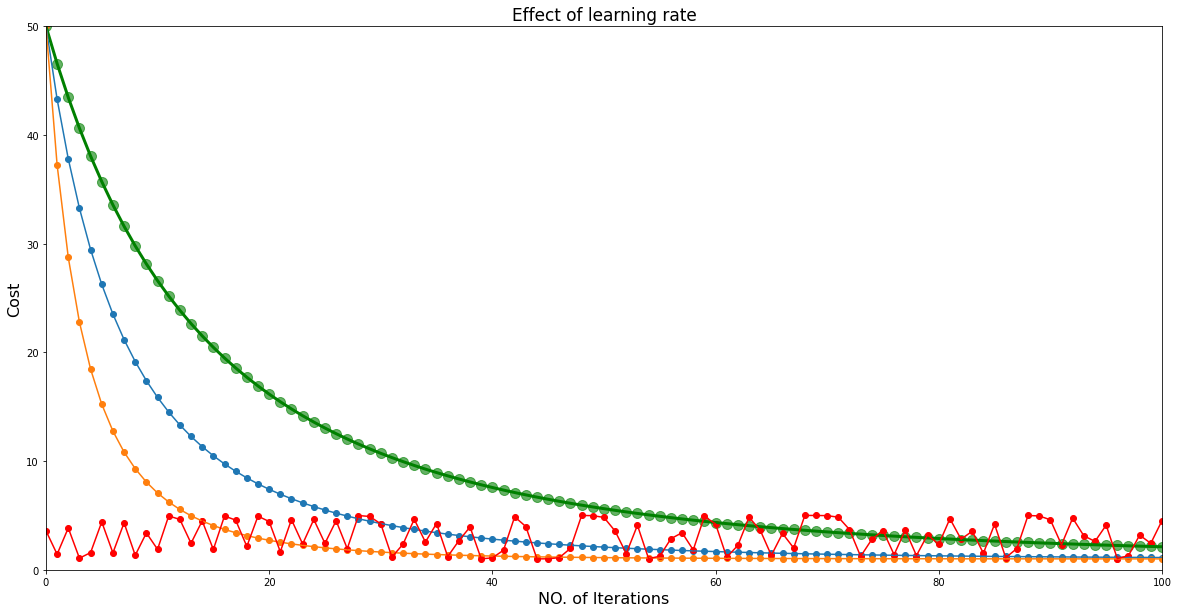

In [42]:
# Calling gradient descent function
n=100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,multiplier = 0.0005,precision=.0001, max_iter = n)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,multiplier = .001, precision = .0001, max_iter = n)
high_gamma = gradient_descent(derivative_func=dg,initial_guess=3,multiplier= .002, precision=.0001, max_iter=n)
non_converging_gamma = gradient_descent(derivative_func=dg,initial_guess=1.9,multiplier=0.25,precision=.0001,max_iter=n)

# Plotting reduction in cost for each iteration
plt.figure(figsize=[20, 10])
plt.xlim(0,n)
plt.ylim(0, 50)
plt.title('Effect of learning rate', fontsize=17)
plt.xlabel('NO. of Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Plotting low learning Rates

# value for our chart 
# 1) Y-axis Data: convert lists to numpy array
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values= np.array(high_gamma[1])
non_values = np.array(non_converging_gamma[1])

# 2) x-axis Data: create a list from 0 to n+1
iteration_list = [ x for x in range(0,n+1)]

# Plot low_gamma
plt.plot(iteration_list, g(low_values), color='green', linewidth=3)
plt.scatter(iteration_list, g(low_values), color='green', s=100, alpha=0.6)
# Plot mid_gamma
plt.plot(iteration_list,g(mid_values))
plt.scatter(iteration_list,g(mid_values))
# Plot high_gamma
plt.plot(iteration_list,g(high_values))
plt.scatter(iteration_list,g(high_values))
# Plot non_converging_gamma
plt.plot(iteration_list,g(non_values),color='red')
plt.scatter(iteration_list,g(non_values),color='red')

plt.show()